In [1]:
#r "nuget:Microsoft.Data.Analysis,0.21.1"
open Microsoft.Data.Analysis

let df = DataFrame.LoadCsv("JoinedStats.csv")
df.Head(5)

Installed Packages Microsoft.Data.Analysis, 0.21.1

Loading extensions from `C:\Users\elabo\.nuget\packages\microsoft.data.analysis\0.21.1\interactive-extensions\dotnet\Microsoft.Data.Analysis.Interactive.dll`

index,Id,name,country_of_birth,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,BirthYear,Age,minutes_played,goals,assists,yellow_cards,red_cards,club_id,club_name
0,3333,Abel Sauer,United States,1986-01-04 00:00:00Z,Central Midfield,Midfield,right,175,1000000,1986,38,55.640816,0.07755102,0.118367344,0.1632653,0,1237,Hidden Dragons
1,71271,Nelson Bednar,Spain,1987-01-03 00:00:00Z,Goalkeeper,Goalkeeper,right,190,600000,1987,37,81.64286,0,0,0.071428575,0,31,Raging Wildabeasts
2,45494,Moses Mitchell,United States,1987-01-24 00:00:00Z,Goalkeeper,Goalkeeper,right,198,250000,1987,37,67.75,0,0,0,0,703,Diamond Dogs
3,52570,Julius Skiles,England,1988-03-17 00:00:00Z,Goalkeeper,Goalkeeper,right,201,1200000,1988,36,86.78571,0,0,0.071428575,0,148,Purple Cobras
4,33027,Dewey Luettgen,United States,1988-04-03 00:00:00Z,Goalkeeper,Goalkeeper,left,193,500000,1988,36,89.66327,0,0.020408163,0.010204081,0,1031,Flying Squirrels


In [2]:
df.Description()

index,Description,Id,date_of_birth,height_in_cm,market_value_in_eur,BirthYear,Age,minutes_played,goals,assists,yellow_cards,red_cards,club_id
0,Length (excluding null values),204,204,204,204,204,204,204,204,204,204,204,204
1,Max,1005649,<null>,201,85000000,2006,38,90,0.6344538,1.5,0.5,0.020833334,1237
2,Min,3333,<null>,163,250000,1986,18,1,0,0,0,0,31
3,Mean,365914.8,<null>,183.47058,19237496,1996.9166,27.083334,64.336006,0.083429985,0.07747277,0.12595744,0.0012042082,749.35785


In [3]:
#r "nuget:MathNet.Numerics, 5.0.0"
open MathNet.Numerics.Statistics

Installed Packages MathNet.Numerics, 5.0.0

In [4]:
let sortedValues = df["market_value_in_eur"]
                |> Seq.cast<single>
                |> Seq.map float
                |> Array.ofSeq
                |> Array.sort

In [5]:
DescriptiveStatistics(sortedValues)

Count,204
Mean,19237500
Variance,315500963669950.8
StandardDeviation,17762346.795115527
Skewness,1.4088863400583054
Kurtosis,1.788555733184937
Maximum,85000000
Minimum,250000


In [6]:
SortedArrayStatistics.Median(sortedValues)

15000000

In [7]:
SortedArrayStatistics.LowerQuartile(sortedValues)

6416666.666666672

In [8]:
SortedArrayStatistics.UpperQuartile(sortedValues)

28000000

In [9]:
#r "nuget:ScottPlot,5.0.37"
#r "nuget:Plotly.NET,5.0.0"
#r "nuget:Plotly.NET.Interactive,5.0.0"

Installed Packages Plotly.NET, 5.0.0 Plotly.NET.Interactive, 5.0.0 ScottPlot, 5.0.37

Loading extensions from `C:\Users\elabo\.nuget\packages\plotly.net.interactive\5.0.0\lib\netstandard2.1\Plotly.NET.Interactive.dll`

Loading extensions from `C:\Users\elabo\.nuget\packages\skiasharp\2.88.8\interactive-extensions\dotnet\SkiaSharp.DotNet.Interactive.dll`

In [10]:
open ScottPlot
open System.IO
open Microsoft.DotNet.Interactive.Formatting

Formatter.Register<ScottPlot.Plot>(
    (fun (plot: ScottPlot.Plot) (writer:TextWriter) -> 
        writer.Write(plot.GetImageHtml(400, 300))), mimeType = "text/html")


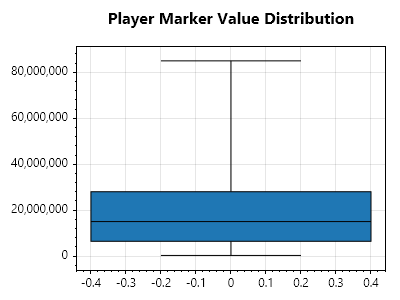

In [11]:
let plot = new Plot();
plot.Title "Player Marker Value Distribution"
plot.Add.Box(new Box(
    WhiskerMax = (sortedValues |> Array.max),
    BoxMax = (sortedValues |> SortedArrayStatistics.UpperQuartile),
    BoxMiddle = (sortedValues |> SortedArrayStatistics.Median),
    BoxMin = (sortedValues |> SortedArrayStatistics.LowerQuartile),
    WhiskerMin = (sortedValues |> Array.min)
))
plot

In [12]:
let marketValues = df["market_value_in_eur"] |> Seq.cast<single>
let positions = df["position"] |> Seq.cast<string>
let clubs = df["club_name"] |> Seq.cast<string>
let goals = df["goals"] |> Seq.cast<single>
let assists = df["assists"] |> Seq.cast<single>
let minutesPerGame = df["minutes_played"] |> Seq.cast<single>
let redCards = df["red_cards"] |> Seq.cast<single>
let playerNames = df["name"] |> Seq.cast<string>

In [13]:
open Plotly.NET

Chart.BoxPlot(Y = marketValues)
    |> Chart.withTitle "Player Market Value Distribution"
    |> Chart.withTraceInfo "Market Value"
    |> Chart.withSize(600,800) 

<!-- Plotly chart will be drawn inside this DIV -->

In [14]:
Chart.BoxPlot(X = marketValues, MultiText=playerNames)
    |> Chart.withTitle "Player Market Value Distribution"
    |> Chart.withTraceInfo "Market Value"
    |> Chart.withSize(500,800)

<!-- Plotly chart will be drawn inside this DIV -->

In [18]:
Chart.BoxPlot(X = marketValues, BoxPoints = StyleParam.BoxPoints.All, MultiText=playerNames, Jitter=0.35)
    |> Chart.withTitle "Player Market Value Distribution"
    |> Chart.withTraceInfo "Market Value"
    |> Chart.withSize(500, 350)

<!-- Plotly chart will be drawn inside this DIV -->

In [19]:
Chart.Violin(X = marketValues)
    |> Chart.withTitle "Player Market Value Distribution"
    |> Chart.withTraceInfo "Market Value"
    |> Chart.withSize(600, 350)

<!-- Plotly chart will be drawn inside this DIV -->

In [21]:
Chart.Violin(X = marketValues,
                Points = StyleParam.JitterPoints.All)
    |> Chart.withTitle "Player Market Value Distribution"
    |> Chart.withTraceInfo "Market Value"
    |> Chart.withSize(600, 350)

<!-- Plotly chart will be drawn inside this DIV -->

In [22]:
Chart.Histogram(X = marketValues)
    |> Chart.withTitle "Player Market Value Distribution"
    |> Chart.withSize(500, 300)

<!-- Plotly chart will be drawn inside this DIV -->